In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from scipy.signal import periodogram

In [40]:
# dfcol =["Year","Day","Hour","ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"]
# df=pd.read_csv('DATASETS\ACE_2020data.txt',sep=',',header=None,names=dfcol)
# df

In [41]:
dfcol =["Year","Day","Hour","DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT"]
df=pd.read_csv('DATASETS\DSCOVR_DATA.txt',sep=',',header=None,names=dfcol)
df

,Year,Day,Hour,"DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT"
0,2017,60,0,5.4,0.2,-2.4
1,2017,60,1,6.7,-0.8,-3.2
2,2017,60,2,9.0,-0.2,-2.4
3,2017,60,3,9.4,-0.8,-2.9
4,2017,60,4,9.9,-1.7,0.9
...,...,...,...,...,...,...
715,2017,89,19,1.8,-3.4,0.1
716,2017,89,20,2.5,-2.4,-1.4
717,2017,89,21,1.4,-3.0,-1.5
718,2017,89,22,0.3,-0.9,-2.4


In [42]:
df = df[~df.isin([999.9]).any(axis=1)]
df.shape

(666, 6)

In [43]:
df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")
df

C:\Users\tanis\AppData\Local\Temp\ipykernel_23272\3209360267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")


,Year,Day,Hour,"DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT",datetime_column
0,2017,60,0,5.4,0.2,-2.4,2017-03-01 00:00:00
1,2017,60,1,6.7,-0.8,-3.2,2017-03-01 01:00:00
2,2017,60,2,9.0,-0.2,-2.4,2017-03-01 02:00:00
3,2017,60,3,9.4,-0.8,-2.9,2017-03-01 03:00:00
4,2017,60,4,9.9,-1.7,0.9,2017-03-01 04:00:00
...,...,...,...,...,...,...,...
715,2017,89,19,1.8,-3.4,0.1,2017-03-30 19:00:00
716,2017,89,20,2.5,-2.4,-1.4,2017-03-30 20:00:00
717,2017,89,21,1.4,-3.0,-1.5,2017-03-30 21:00:00
718,2017,89,22,0.3,-0.9,-2.4,2017-03-30 22:00:00


In [44]:
impcol=["DSCOVR Bx_gse, nT","DSCOVR By_gse, nT","DSCOVR Bz_gse, nT"]

In [45]:
df.dtypes

Year                          int64
Day                           int64
Hour                          int64
DSCOVR Bx_gse, nT           float64
DSCOVR By_gse, nT           float64
DSCOVR Bz_gse, nT           float64
datetime_column      datetime64[ns]
dtype: object

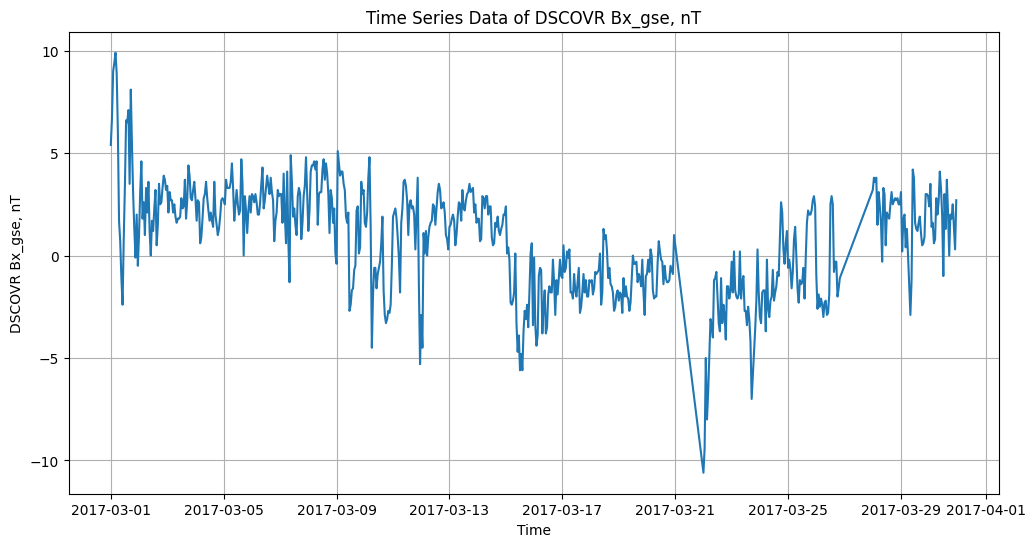

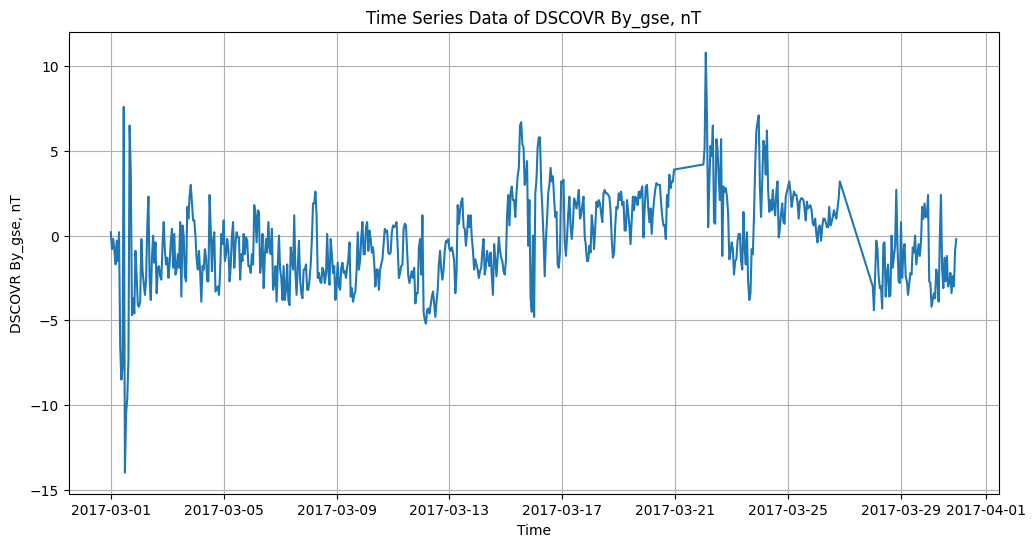

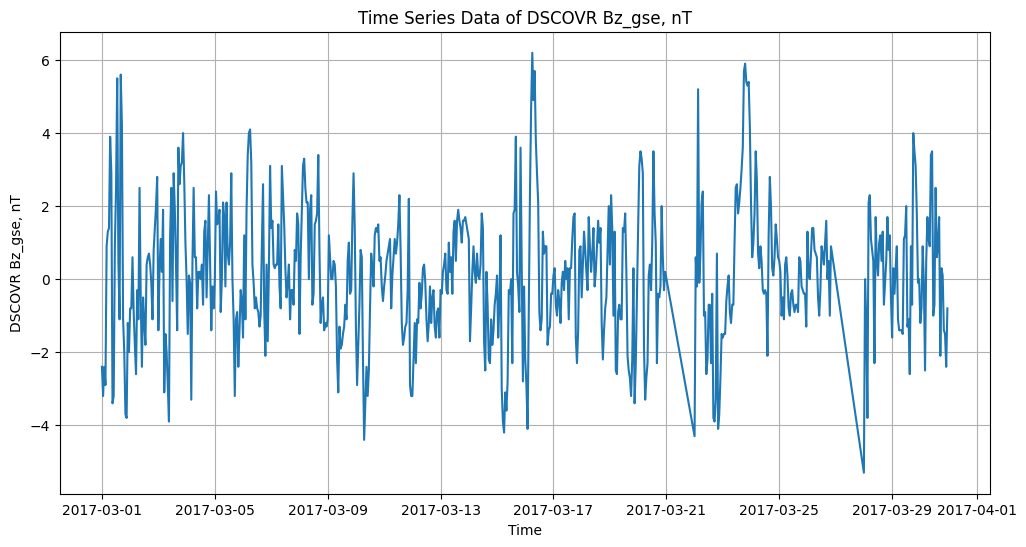

In [46]:
for i in impcol:
    plt.figure(figsize=(12, 6))
    plt.plot(df['datetime_column'], df[i])
    plt.title('Time Series Data of '+i)
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.grid(True)
    plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_23272\2409200826.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / xf, amplitude)


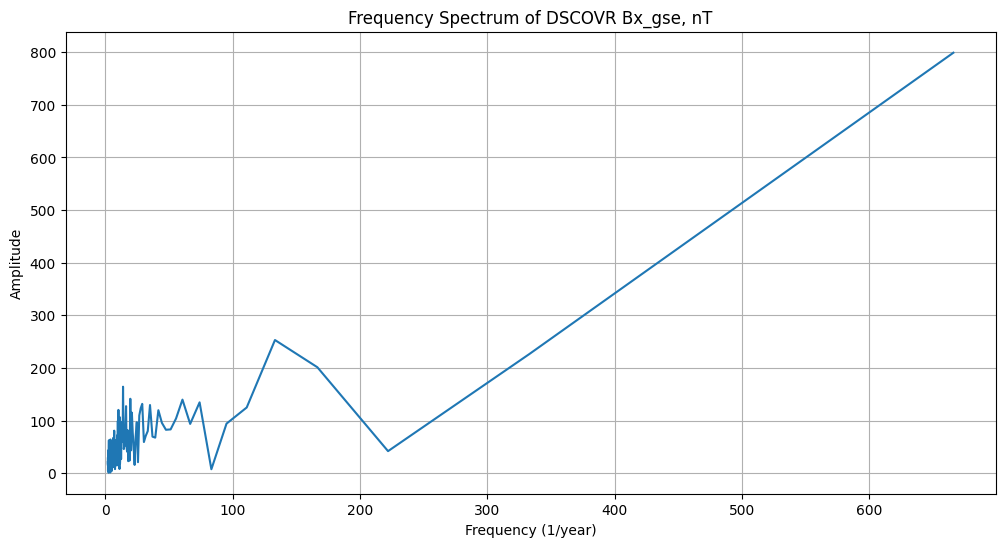

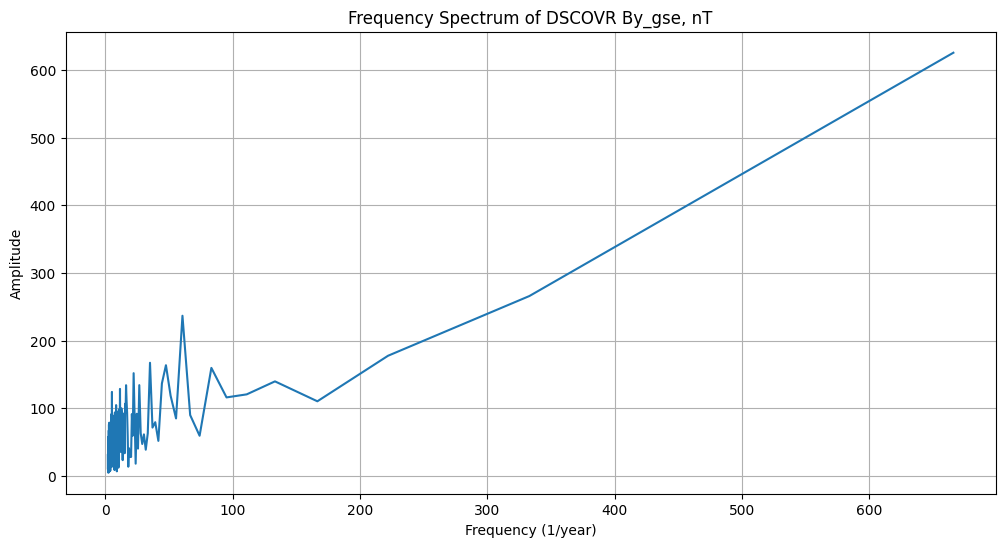

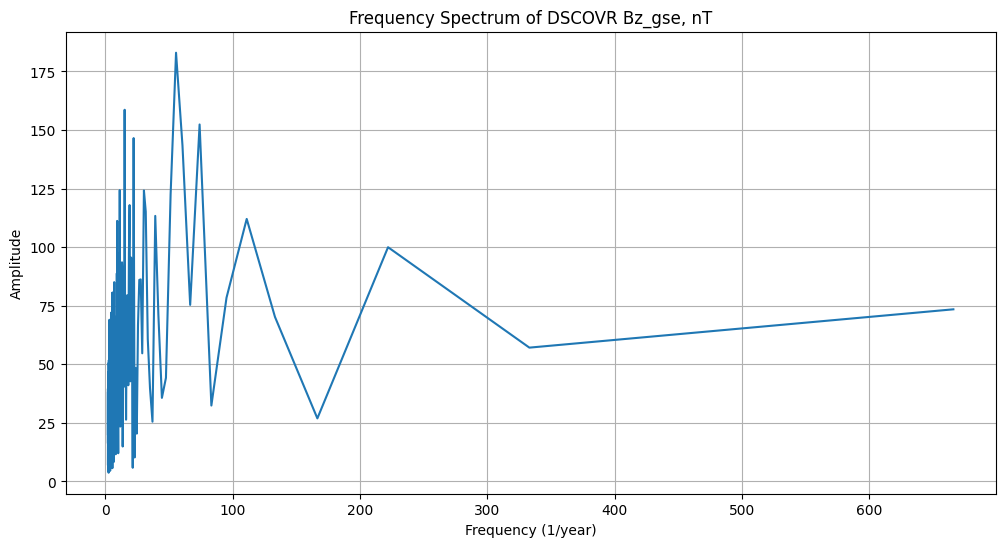

In [47]:
# Perform FFT on the time series data
for i in impcol:
    N = len(df)
    yf = fft(df[i].values)
    xf = np.fft.fftfreq(N, 1)  # Frequency bins

    # Calculate the amplitude spectrum (absolute values)
    amplitude = np.abs(yf)[:N // 2]
    xf = xf[:N // 2]

    # Plot the amplitude spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(1 / xf, amplitude)
    plt.title('Frequency Spectrum of '+i)
    plt.xlabel('Frequency (1/year)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


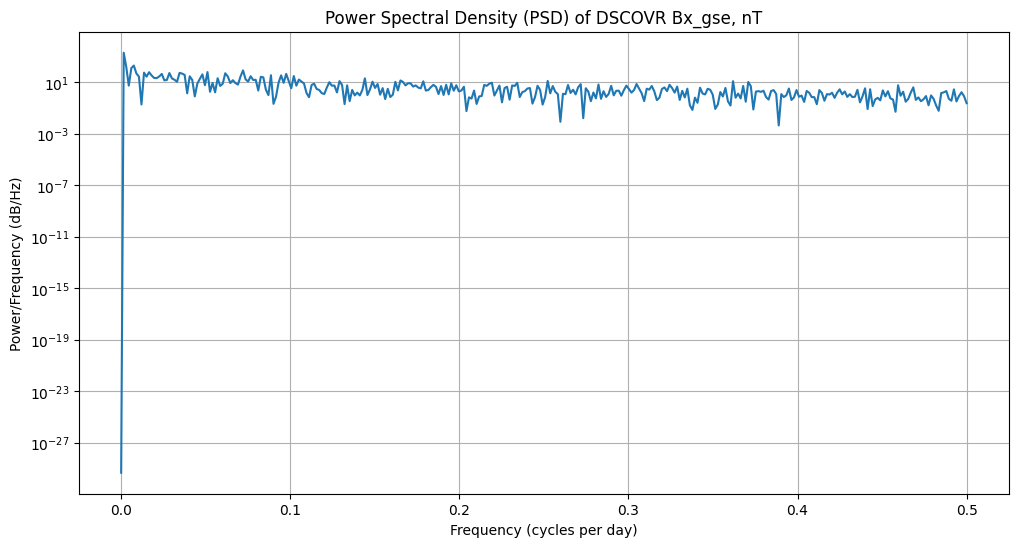

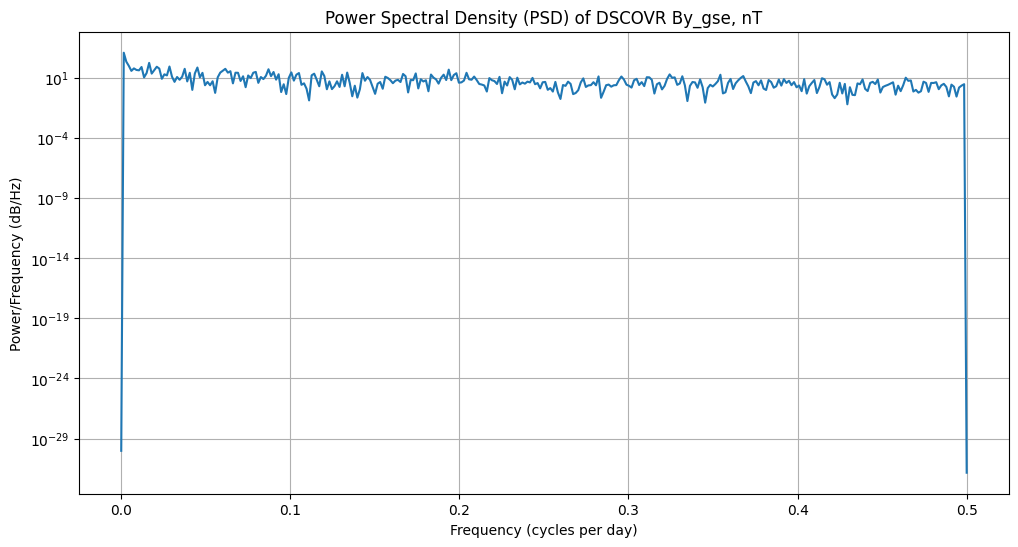

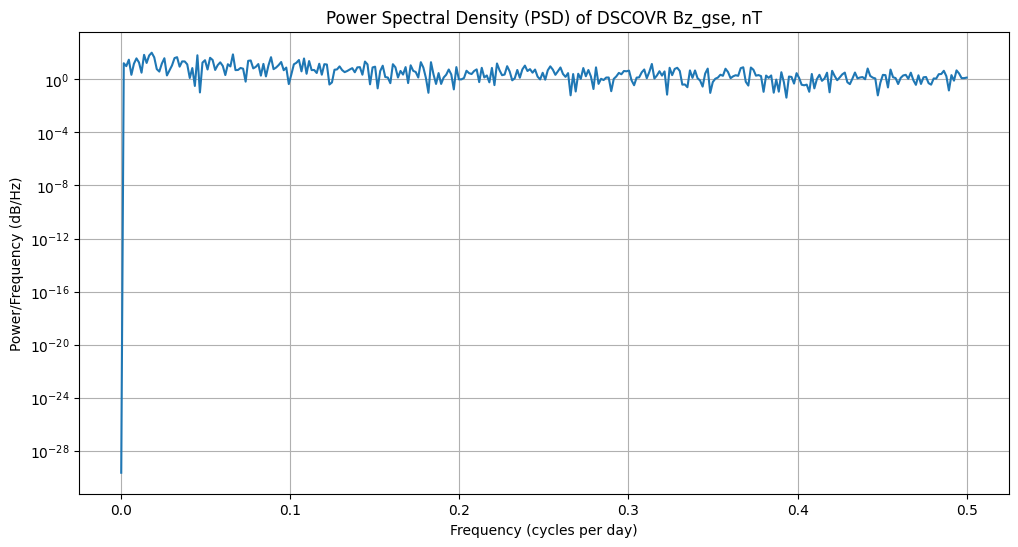

In [48]:
for i in impcol:
    frequencies, power_density = periodogram(df[i], fs=1.0)  # Assuming data is sampled daily

    # Plot the power spectral density
    plt.figure(figsize=(12, 6))
    plt.semilogy(frequencies, power_density)
    plt.title('Power Spectral Density (PSD) of '+i)
    plt.xlabel('Frequency (cycles per day)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.grid(True)
    plt.show()

In [49]:
dfcol =["Year","Day","Hour","ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"]
ace_df=pd.read_csv('DATASETS\ACE_DATA.txt',sep=',',header=None,names=dfcol)
ace_df = ace_df[~ace_df.isin([999.9]).any(axis=1)]
ace_df["datetime_column"] = pd.to_datetime(ace_df["Year"].astype(str) + ace_df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")
ace_df

,Year,Day,Hour,"ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT",datetime_column
0,1998,60,0,2.0,0.6,-1.9,1998-03-01 00:00:00
1,1998,61,0,2.2,-5.0,-0.5,1998-03-02 01:00:00
2,1998,62,0,0.9,-3.7,0.9,1998-03-03 02:00:00
3,1998,63,0,0.6,1.6,-2.6,1998-03-04 03:00:00
4,1998,64,0,-4.4,8.1,3.7,1998-03-05 04:00:00
...,...,...,...,...,...,...,...
87,1998,147,0,0.4,-1.0,0.1,1998-05-27 15:00:00
88,1998,148,0,-0.8,0.0,1.2,1998-05-28 16:00:00
89,1998,149,0,-5.4,5.0,3.3,1998-05-29 17:00:00
90,1998,150,0,0.5,0.9,-0.4,NaT


In [50]:
dfcol =["Year","Day","Hour","WIND Bx_gse, nT","WIND By_gse, nT","WIND Bz_gse, nT"]
wind_df=pd.read_csv('DATASETS\WIND_DATA.txt',sep=',',header=None,names=dfcol)
wind_df = wind_df[~wind_df.isin([999.9]).any(axis=1)]
wind_df["datetime_column"] = pd.to_datetime(wind_df["Year"].astype(str) + wind_df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")
wind_df

,Year,Day,Hour,"WIND Bx_gse, nT","WIND By_gse, nT","WIND Bz_gse, nT",datetime_column
0,1998,60,0,2.3,0.5,-1.6,1998-03-01 00:00:00
1,1998,61,0,2.4,-5.1,-0.2,1998-03-02 01:00:00
2,1998,62,0,1.1,-3.6,1.3,1998-03-03 02:00:00
3,1998,63,0,0.8,1.2,-2.7,1998-03-04 03:00:00
4,1998,64,0,-4.0,8.4,2.9,1998-03-05 04:00:00
...,...,...,...,...,...,...,...
87,1998,147,0,0.7,-0.8,-0.2,1998-05-27 15:00:00
88,1998,148,0,-0.6,0.2,1.3,1998-05-28 16:00:00
89,1998,149,0,-5.3,4.9,3.1,1998-05-29 17:00:00
90,1998,150,0,0.3,1.9,-0.7,NaT


In [51]:
ace_df.columns

Index(['Year', 'Day', 'Hour', 'ACE Bx_gse, nT', 'ACE By_gse, nT',
       'ACE Bz_gse, nT', 'datetime_column'],
      dtype='object')

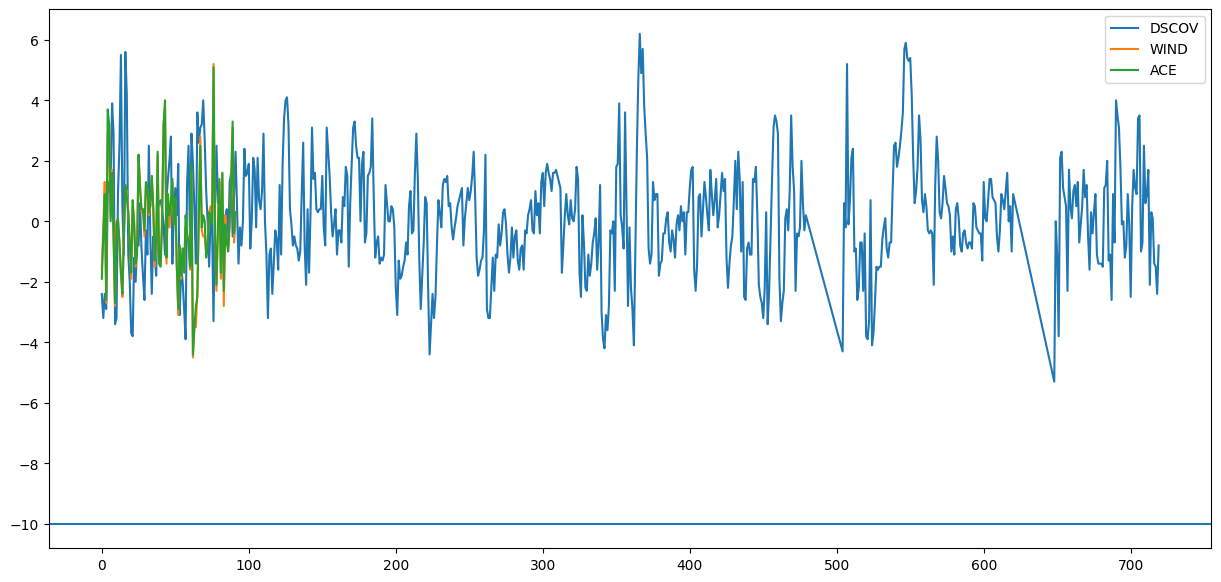

In [52]:
plt.figure(figsize=(15, 7))
plt.plot(df["DSCOVR Bz_gse, nT"], label = "DSCOV")
plt.plot(wind_df["WIND Bz_gse, nT"], label = "WIND")
plt.plot(ace_df["ACE Bz_gse, nT"], label = "ACE")

plt.axhline(y=-10)
plt.legend()
plt.show()